<a href="https://colab.research.google.com/github/javamohammed/FuelEconomyML/blob/main/Simple_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power
    - Dependant variable Y: Mileage Per Gallon (MPG)

# STEP #1: LIBRARIES IMPORT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #2: IMPORT DATASET

In [2]:
fuelEconomyData = pd.read_csv("/content/FuelEconomy.csv")

In [3]:
fuelEconomyData.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [4]:
fuelEconomyData.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [5]:
fuelEconomyData.count()

Horse Power           100
Fuel Economy (MPG)    100
dtype: int64

In [11]:
fuelEconomyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# STEP#3: VISUALIZE DATASET

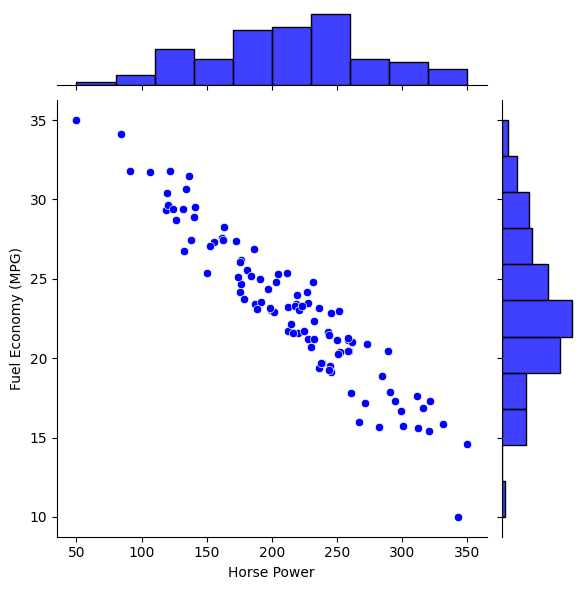

In [12]:
sns.jointplot(x="Horse Power", y="Fuel Economy (MPG)", data=fuelEconomyData, color="blue")
plt.show()

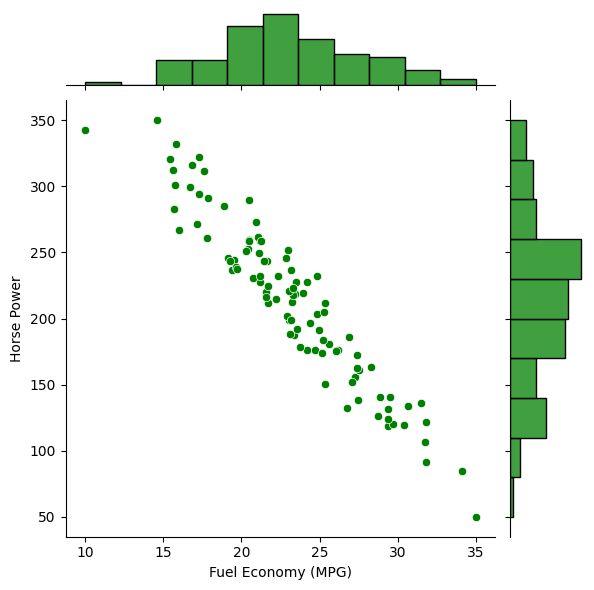

In [14]:
sns.jointplot(y="Horse Power", x="Fuel Economy (MPG)", data=fuelEconomyData, color="green")
plt.show()

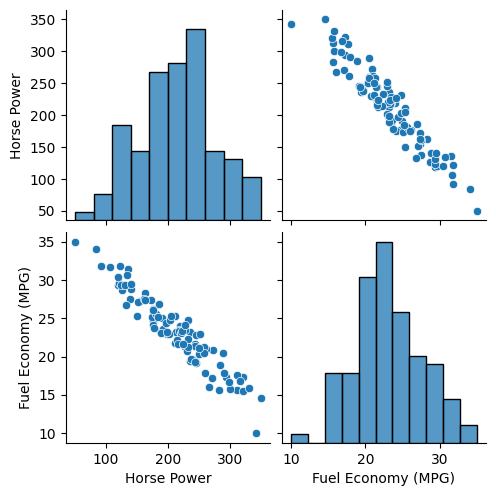

In [15]:
sns.pairplot(fuelEconomyData)
plt.show()

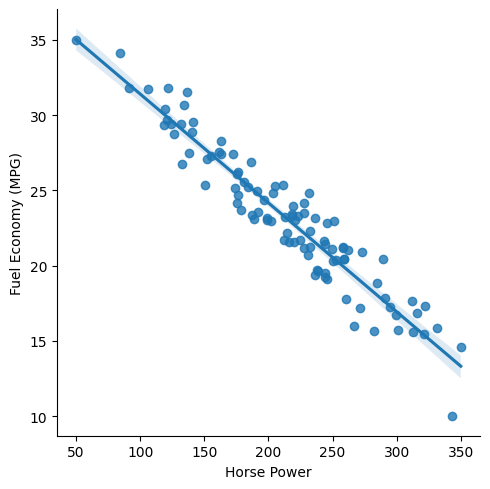

In [18]:
sns.lmplot(x="Horse Power", y="Fuel Economy (MPG)", data=fuelEconomyData)
plt.show()

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [19]:
X = fuelEconomyData.iloc[:,0:1]
y = fuelEconomyData.iloc[:, 1:]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
X_train.count(), X_test.count(), y_train.count(), y_test.count()

(Horse Power    75
 dtype: int64,
 Horse Power    25
 dtype: int64,
 Fuel Economy (MPG)    75
 dtype: int64,
 Fuel Economy (MPG)    25
 dtype: int64)

# STEP#5: TRAIN THE MODEL

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X=X_train, y=y_train)

LinearRegression()

In [22]:
model.score(X_test, y_test)

0.9198017322387343

In [23]:
# y = b + m*x
print("Linear Model Coeff (m):", model.coef_)
print("Linear Model Coeff (b):", model.intercept_)

Linear Model Coeff (m): [[-0.07015591]]
Linear Model Coeff (b): [38.11924217]


# STEP#6: TEST THE MODEL


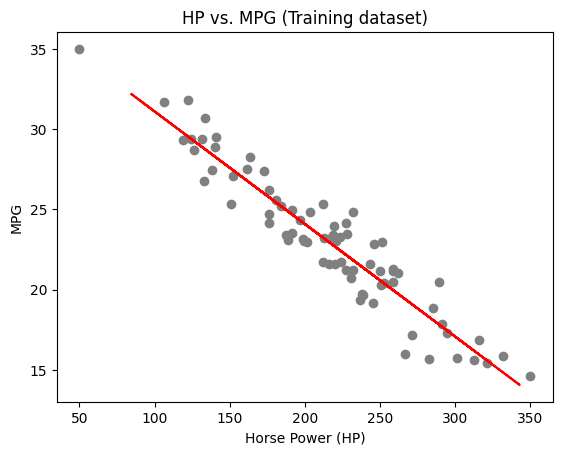

In [40]:
y_predict = model.predict(X_test)
plt.scatter(x=X_train, y=y_train, color="gray")
plt.plot(X_test, y_predict, color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')
plt.show()

Text(0.5, 1.0, 'HP vs. MPG (Testing dataset)')

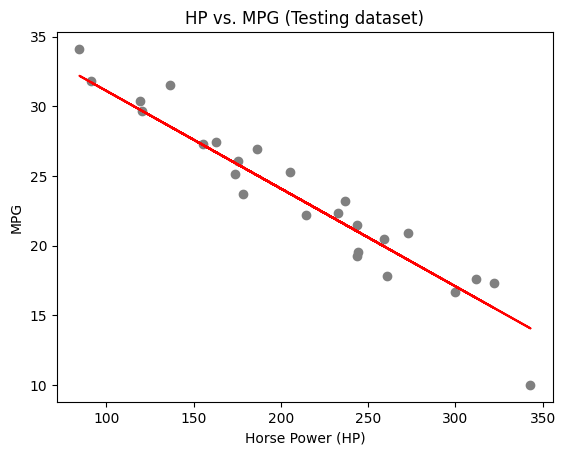

In [38]:
y_predict = model.predict(X_test)
plt.scatter(x=X_test, y=y_test, color="gray")
plt.plot(X_test, y_predict, color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')

In [42]:
hp = 352
model.predict([[hp]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.42436342]])